<a href="https://colab.research.google.com/github/eqbic/OSMI/blob/main/DataScience/ESA12/ESA12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data_url = 'https://raw.githubusercontent.com/eqbic/OSMI/main/DataScience/ESA12/data/edlich-kmeans-A0.csv'
df = pd.read_csv(data_url)
df

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216
...,...,...,...
95,5.240474,2.983800,5.104915
96,-1.675543,3.780111,-8.060940
97,2.979751,10.772783,-10.093143
98,-5.154519,5.976515,2.794622


**Analyse der Daten**

Ein erstes Plotten des Datensatzes in ein 3D-Diagramm zeigt: K=5

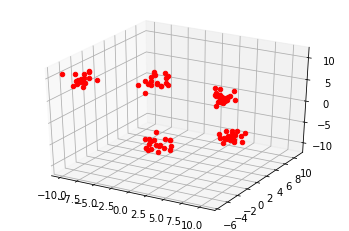

In [3]:
samples = [[df['V1'][i], df['V2'][i], df['V3'][i]] for i in range(len(df['V1']))]
X = np.array(samples)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for point in X:
    ax.scatter(*point, color='red')
plt.show()

**Bestimmen der Centroids für jedes Cluster**

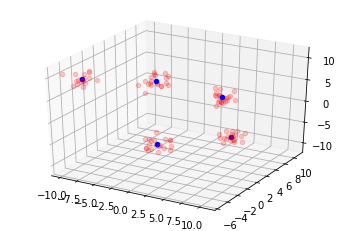

In [14]:
K = 5
clf = KMeans(n_clusters=K)
clf.fit(X)

centroids = clf.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for point in X:
    ax.scatter(*point, color='red', alpha=0.2)
for centroid in centroids:
    ax.scatter(*centroid, color='blue')
plt.show()

**Bestimmen des Clustering-Vectors:**

In [15]:
labels = clf.predict(X)
labels

array([1, 0, 0, 3, 0, 4, 3, 0, 2, 3, 0, 2, 3, 4, 1, 0, 2, 4, 1, 1, 0, 2,
       1, 0, 0, 3, 2, 2, 2, 4, 2, 2, 4, 4, 0, 1, 4, 1, 2, 0, 4, 4, 4, 1,
       4, 0, 3, 3, 4, 3, 3, 4, 2, 2, 3, 3, 1, 3, 0, 4, 3, 1, 3, 3, 4, 3,
       1, 1, 1, 4, 4, 3, 2, 3, 3, 2, 0, 4, 3, 2, 2, 4, 0, 1, 1, 0, 1, 1,
       1, 3, 2, 2, 2, 0, 3, 3, 2, 4, 1, 1], dtype=int32)

In [16]:
df['Label'] = labels
df

,V1,V2,V3,Label
0,-5.340236,4.747246,3.823326,1
1,-9.587065,-3.434466,9.701839,0
2,-8.385012,-3.902794,8.514620,0
3,5.708226,2.658575,5.404482,3
4,-7.431665,-4.390251,9.003216,0
...,...,...,...,...
95,5.240474,2.983800,5.104915,3
96,-1.675543,3.780111,-8.060940,2
97,2.979751,10.772783,-10.093143,4
98,-5.154519,5.976515,2.794622,1
